In [ ]:
from fastai.vision.all import *

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
working_path = Path.cwd(); print(working_path)
folders = ('train', 'valid')
labels = ('0', '1')

c:\Users\tanis\VS CODE PROGRAM FILES\GOOGLE GIRL HACKATHON\FloodMapping


In [3]:
training_images = get_image_files(working_path/'train'); print(len(training_images))

270


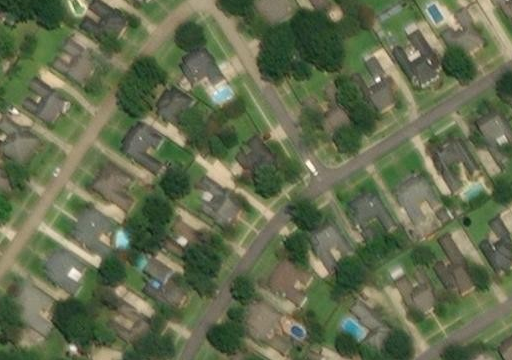

In [4]:
Image.open(training_images[0])

52


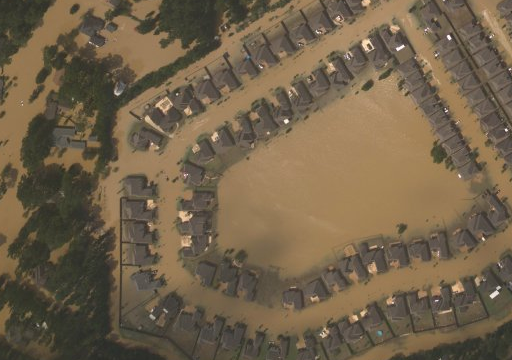

In [5]:
validation_images = get_image_files(working_path/'valid'); print(len(validation_images))
Image.open(validation_images[-1])

In [6]:
dataloaders = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(working_path, bs=32)

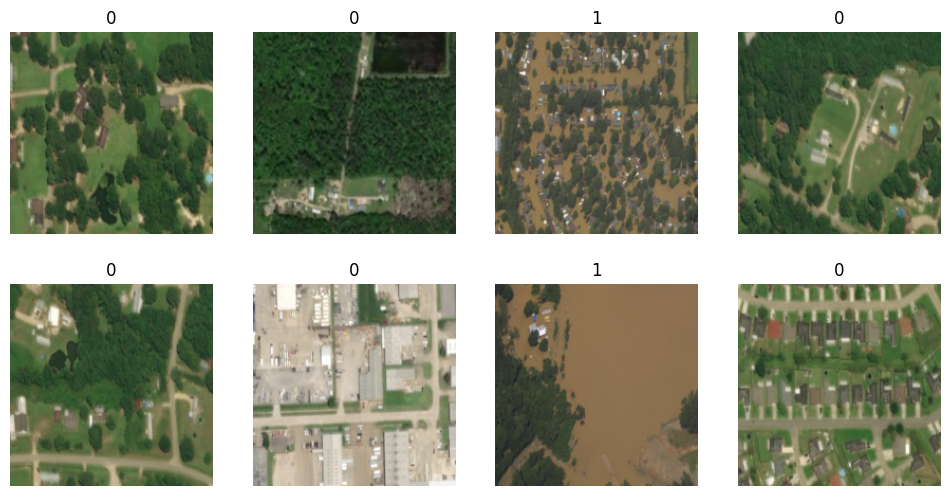

In [7]:
dataloaders.show_batch(max_n=8)

In [8]:
learner = vision_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(9)

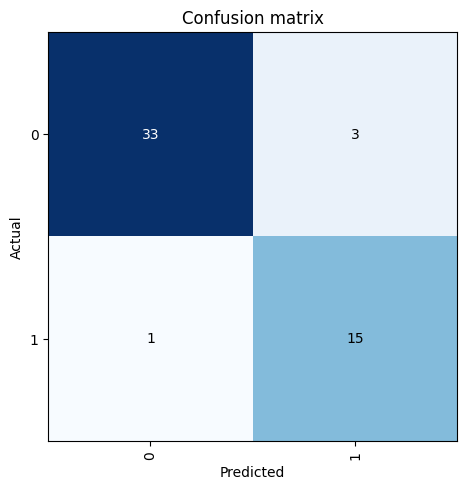

In [9]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

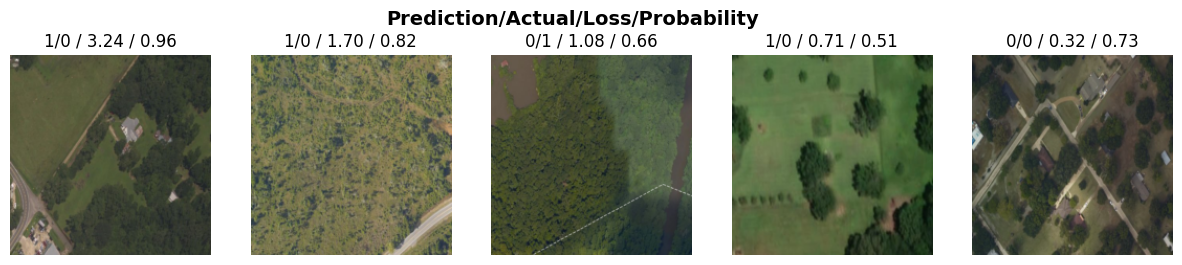

In [10]:
interp.plot_top_losses(5, nrows=1)

In [11]:
def infer_image(image_path):
    display(Image.open(image_path))
    label, _, probabilities = learner.predict(PILImage(PILImage.create(image_path)))
    if label == '0':
        print(f"The area shown in the image is not flooded with probability {probabilities[0]*100:.2f}%.")
    elif label == '1':
        print(f"The area shown in the image is flooded with probability {probabilities[1]*100:.2f}%.")
    else:
        print("Unknown label assigned to image.")


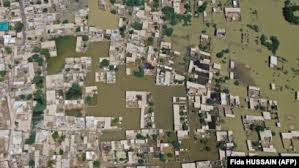

The area shown in the image is flooded with probability 86.02%.


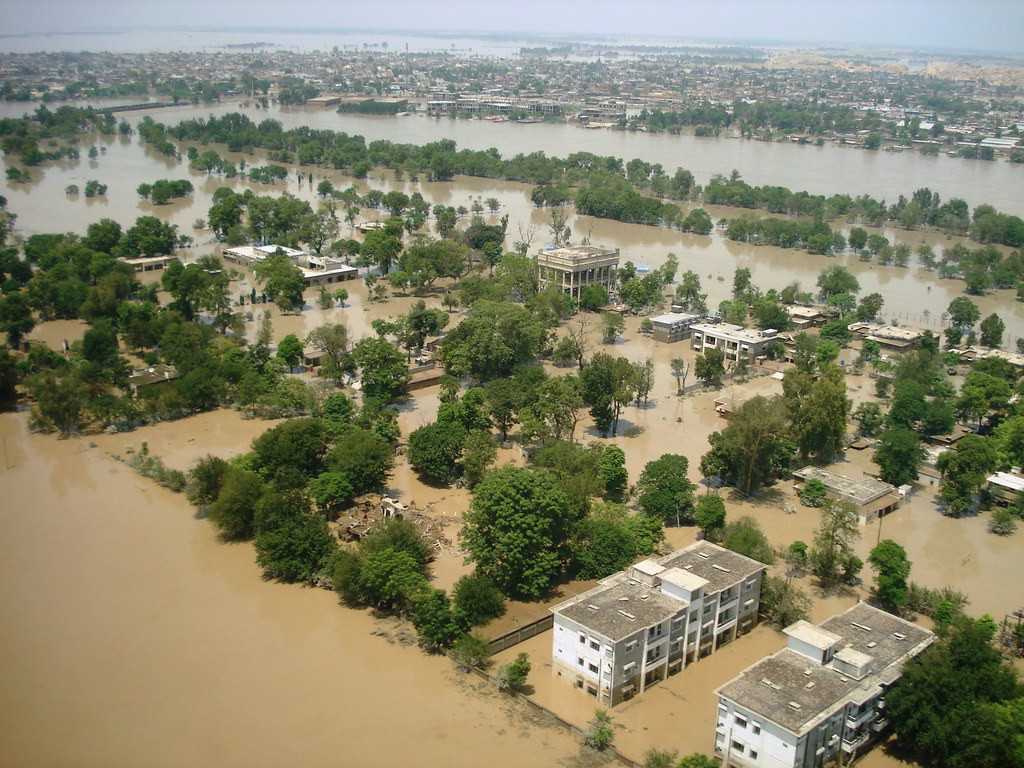

The area shown in the image is flooded with probability 90.78%.


In [13]:
infer_image(working_path/'test'/'pakistan.png')
infer_image(working_path/'test'/'2.png')


In [14]:
augmented_dataloaders = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(192, min_scale=0.5),
    batch_tfms=aug_transforms()
).dataloaders(working_path, bs=32)

In [15]:
augmented_learner = vision_learner(augmented_dataloaders, resnet18, metrics=error_rate)
augmented_learner.fine_tune(9)

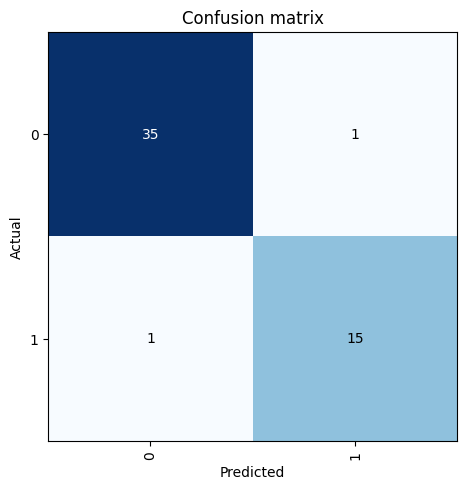

In [16]:
interp = ClassificationInterpretation.from_learner(augmented_learner)
interp.plot_confusion_matrix()

In [17]:
def augmented_infer_image(image_path):
    display(Image.open(image_path))
    label, _, probabilities = augmented_learner.predict(PILImage(PILImage.create(image_path)))
    if label == '0':
        print(f"The area shown in the image is not flooded with probability {probabilities[0]*100:.2f}%.")
    elif label == '1':
        print(f"The area shown in the image is flooded with probability {probabilities[1]*100:.2f}%.")
    else:
        print("Unknown label assigned to image.")

In [20]:
import keras
augmented_learner.save("flood_detection.h5")

Path('models/flood_detection.h5.pth')

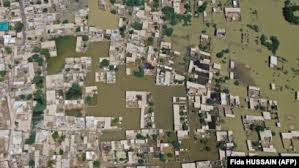

The area shown in the image is not flooded with probability 99.52%.


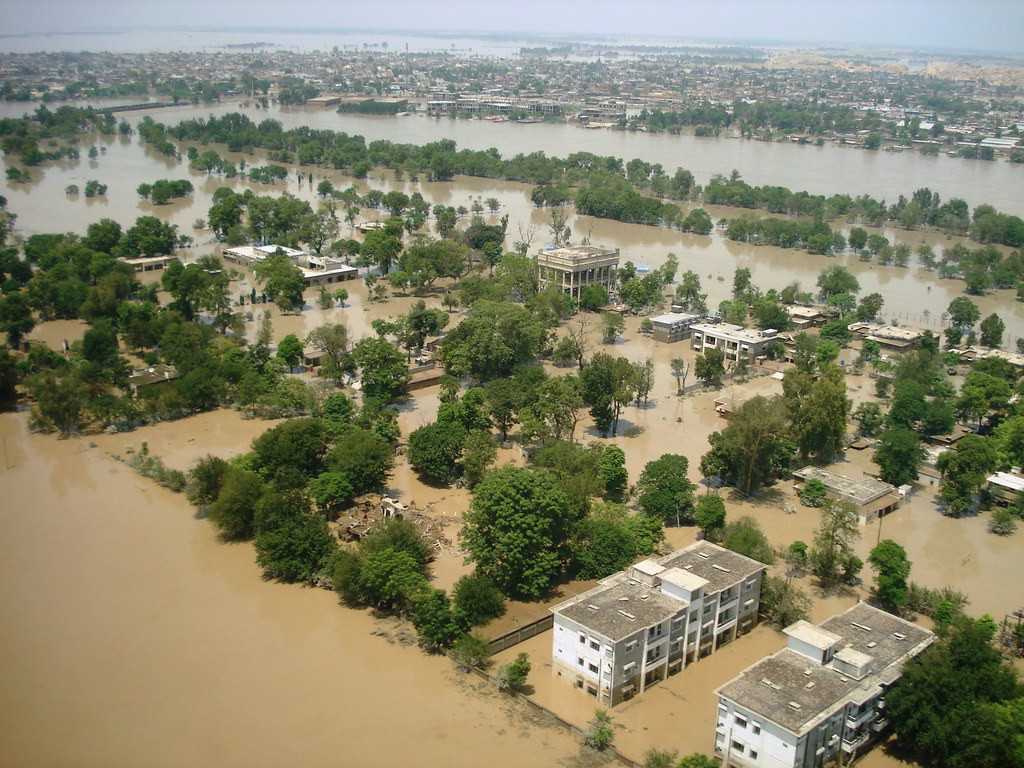

The area shown in the image is flooded with probability 99.26%.


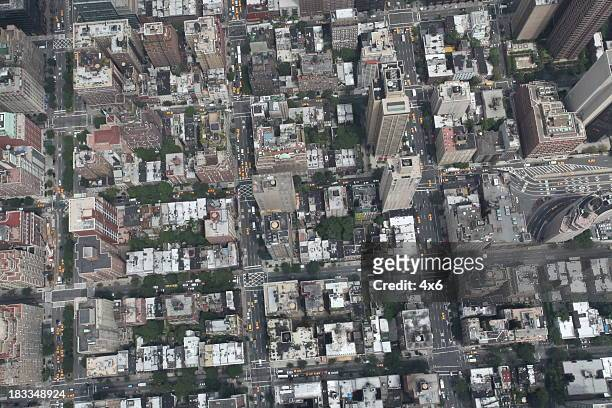

The area shown in the image is not flooded with probability 98.79%.


In [19]:
augmented_infer_image(working_path/'test'/'pakistan.png')
augmented_infer_image(working_path/'test'/'2.png')
augmented_infer_image(working_path/'test'/'city.jpg')